In [1]:
import os, shutil

In [2]:
original_dataset_dir = 'C:/Users/Muhammad Ansar/images'
base_dir = 'C:/Users/Muhammad Ansar/happy sad small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)    

# TRAIN DIRECTORY

In [3]:
train_happy_dir = os.path.join(train_dir, 'happy')
os.mkdir(train_happy_dir)
train_sad_dir = os.path.join(train_dir, 'sad')
os.mkdir(train_sad_dir)

# TEST DIRECTORY

In [4]:
test_happy_dir = os.path.join(test_dir, 'happy')
os.mkdir(test_happy_dir)
test_sad_dir = os.path.join(test_dir, 'sad')
os.mkdir(test_sad_dir)


# VALIDATION DIRECTORY

In [5]:

validation_happy_dir = os.path.join(validation_dir, 'happy')
os.mkdir(validation_happy_dir)

validation_sad_dir = os.path.join(validation_dir, 'sad')
os.mkdir(validation_sad_dir)



# RENAMING PICTURES


## HAPPY

In [6]:
import os
 
# Function to rename multiple files
def main():
   
    folder = "C:/Users/Muhammad Ansar/images/train/happy"
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"{str(count)}.jpg"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"
         
        # rename() function will
        # rename all the files
        os.rename(src, dst)
 
# Driver Code
if __name__ == '__main__':
     
    # Calling main() function
    main()

## SAD

In [7]:
import os
 
# Function to rename multiple files
def main():
   
    folder = "C:/Users/Muhammad Ansar/images/train/sad"
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"{str(count)}.jpg"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"
         
        # rename() function will
        # rename all the files
        os.rename(src, dst)
 
# Driver Code
if __name__ == '__main__':
     
    # Calling main() function
    main()

# copying images from the dataset

In [8]:
# TRAINING

In [9]:
original_dataset_dir = 'C:/Users/Muhammad Ansar/images/train/sad'
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_sad_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
original_dataset_dir = 'C:/Users/Muhammad Ansar/images/train/happy'
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_happy_dir, fname)
    shutil.copyfile(src, dst)

# VALIDATION

In [11]:
original_dataset_dir = 'C:/Users/Muhammad Ansar/images/train/sad'
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_sad_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
original_dataset_dir = 'C:/Users/Muhammad Ansar/images/train/happy'
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_happy_dir, fname)
    shutil.copyfile(src, dst)

# TEST

In [13]:
original_dataset_dir = 'C:/Users/Muhammad Ansar/images/train/sad'
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_sad_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
original_dataset_dir = 'C:/Users/Muhammad Ansar/images/train/happy'
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_happy_dir, fname)
    shutil.copyfile(src, dst)

#  Instantiating a small convnet for facial expressions classification

In [15]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# Configuring the model for training

In [17]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

F:\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Using ImageDataGenerator to read images from directories

In [18]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),
batch_size=20,
class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [20]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=60,
class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 2)


# Fitting the model using a batch generator

In [23]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 117s 1s/step - loss: 0.6937 - acc: 0.5010 - val_loss: 0.6928 - val_acc: 0.5105
Epoch 2/30
100/100 [==============================] - 99s 987ms/step - loss: 0.6903 - acc: 0.4960
Epoch 3/30
100/100 [==============================] - 113s 1s/step - loss: 0.6610 - acc: 0.5020
Epoch 4/30
100/100 [==============================] - 178s 2s/step - loss: 0.6030 - acc: 0.5188
Epoch 5/30
100/100 [==============================] - 152s 2s/step - loss: 0.5641 - acc: 0.5525
Epoch 6/30
100/100 [==============================] - 161s 2s/step - loss: 0.5408 - acc: 0.5857
Epoch 7/30
100/100 [==============================] - 196s 2s/step - loss: 0.5171 - acc: 0.6240
Epoch 8/30
100/100 [==============================] - 185s 2s/step - loss: 0.4888 - acc: 0.6565
Epoch 9/30
100/100 [==============================] - 142s 1s/step - loss: 0.4651 - acc: 0.6665
Epoch 10/30
100/100 [==============================] - 159s 2s/step - loss: 0.4380 - acc: 0.6990


# Saving the mode

In [24]:
model.save('facial_expressions_small_1.h5')

# Displaying curves of loss and accuracy during training


ValueError: x and y must have same first dimension, but have shapes (30,) and (1,)

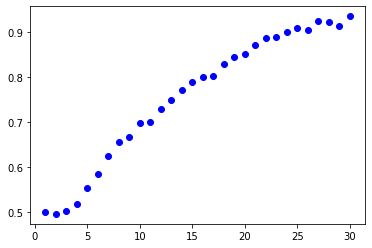

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()